In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
train_data['Embarked'] = train_data.Embarked.fillna('S')
train_data['Cabin'] = train_data.Cabin.fillna('U0')
train_data['Age'] = train_data.Age.fillna(train_data.Age.median())
test_data['Age'] = test_data.Age.fillna(test_data.Age.median())
test_data['Fare'].fillna(test_data['Fare'].median(),inplace=True)
test_data['Fare']=test_data['Fare'].astype(int)
test_data['Cabin'] = test_data.Cabin.fillna('U0')

In [ ]:
x = train_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = train_data[['Survived']]

In [ ]:
x['Sex'] = x.Sex.replace('male',1)
x['Sex'] = x.Sex.replace('female',0)
x['Embarked'] = x.Embarked.replace('S',0)
x['Embarked'] = x.Embarked.replace('C',1)
x['Embarked'] = x.Embarked.replace('Q',2)

In [ ]:
x_test = test_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
x_test['Sex'] = x_test.Sex.replace('male',1)
x_test['Sex'] = x_test.Sex.replace('female',0)
x_test['Embarked'] = x_test.Embarked.replace('S',0)
x_test['Embarked'] = x_test.Embarked.replace('C',1)
x_test['Embarked'] = x_test.Embarked.replace('Q',2)

In [ ]:
x.to_csv("new_train.csv")

In [ ]:
y.to_csv("servive.csv")

In [ ]:
y

In [ ]:
from keras.utils import np_utils
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
X_train_norm=minmax_scale.fit_transform(x)
y_train_onehot = np_utils.to_categorical(y, 2)

X_test_norm=minmax_scale.fit_transform(x_test)

In [ ]:
#from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(units=256,input_dim=7,kernel_initializer='random_uniform',activation='relu'))
model.add(Dense(units=128,kernel_initializer='random_uniform',activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(units=2,kernel_initializer='random_uniform',activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               2048      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 258       
Total params: 35,202
Trainable params: 35,202
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
#checkpointer = ModelCheckpoint(filepath='./NNModel.h5', verbose=1, save_best_only=True)
#early=EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto', baseline=None)
#call_list=[checkpointer,early]
train_history = model.fit(x=X_train_norm,y=y_train_onehot,validation_split=0.1,epochs=100,batch_size=128,verbose=1)

In [ ]:
import matplotlib.pyplot as plt  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()

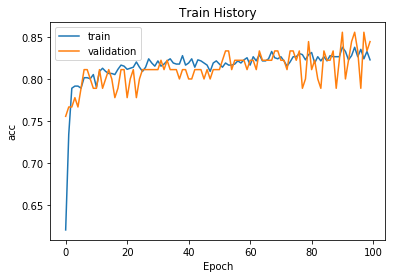

In [ ]:
show_train_history(train_history,'acc','val_acc')

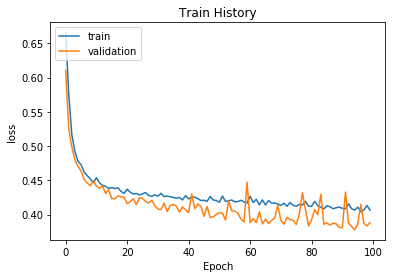

In [ ]:
show_train_history(train_history,'loss','val_loss')

In [ ]:
x_test_pred = model.predict_classes(x_test)
x_test_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
s=({"PassengerId":test_data["PassengerId"],"Survived":x_test_pred})
submit=pd.DataFrame(data = s)
submit.to_csv('./test_pred.csv',index=False)